In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nbodykit.lab import *
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
#Jiamin's Code
from mk_Gaussian_Catalog import GenerateGRF
from nbodykit.cosmology.correlation import *
import nbodykit.algorithms.paircount_tpcf.tpcf as _2pcf

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22
print("Import necessary libraries and packages")

Import necessary libraries and packages


### Create 10 realizations of the GRF

In [3]:
Nmesh = 64
cname = '/Users/jamessunseri/desktop/uf_reu/4pcf_ISM/Testing/2pcf_theory_realizations/'
Pk_in = None
N = 10

In [4]:
for i in range(N):  
    cname_dfield = 'deltar_' + str(i)
    cname_GRF = 'GRF_data_' + str(i)
    grf_i = GenerateGRF(Nmesh, Pk_in=Pk_in, do_inv_phase=True, cname=cname, 
                      cname_GRF=cname_GRF,cname_dfield = cname_dfield)
    grf_i.run_mk_catalog_grf_weighted(do_save_catalog=True)

#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565


/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/jamessunseri/anaconda3/lib/python3.7/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565
#obj= 587071 vol=3.900000 [Gpc/h]^3 lbox=1574.000000 [Mpc/h] nbar= 0.00015053102564102565


### Create the list of GRF Catalogs

In [5]:
GRF_list = []
for i in range(N):
    cname_GRF = 'GRF_data_' + str(i)
    data_GRF_i = np.loadtxt(cname + cname_GRF + '.txt')
    GRF_Catalog_i = ArrayCatalog({'Position':data_GRF_i[:,0:3]}, attrs='ext')
    GRF_Catalog_i['Weight'] = data_GRF_i[:,3]
    GRF_list.append(GRF_Catalog_i)

## Run 2PCF Calculations on each GRF Catalog

### Load in Radial Bins

In [6]:
boundsandnumber = np.load("../Workspace/bin_bounds_and_pixel_number_demo.npy")
nbins = len(boundsandnumber[0,:]) - 1

print("The bin edges are:")
bin_edges = boundsandnumber[0,:]
print(bin_edges)

The bin edges are:
[ 0.99999   8.749995 16.5      24.250005 32.00001 ]


### Run Nbodykit algorithm

In [7]:
_2PCF_list = []
for i in range(N):
    GRF_Catalog_i = GRF_list[i]
    twopcf_i = SimulationBox2PCF(mode='1d', data1=GRF_Catalog_i, edges=bin_edges, BoxSize=1574) 
    twopcf_i.run()
    _2PCF_list.append(twopcf_i)

### Organize all the Realization Data into an Array

In [8]:
all_data = []
for i in range(N):
    twopcf_i = _2PCF_list[i]
    GRF_2PCF_Data_i = twopcf_i.corr.data
    rs_i = []
    corrs_i = []
    for j in range(len(GRF_2PCF_Data_i)):
        corr_j = GRF_2PCF_Data_i[j][0]
        r_j = (GRF_2PCF_Data_i[j][1]/64)*1574
        rs_i.append(r_j)
        corrs_i.append(corr_j)
    data_i = [rs_i, corrs_i]
    all_data.append(data_i)

### Calculate the Mean and Error on N realizations of the GRF

In [9]:
corr_i_0s = []
corr_i_1s = []
corr_i_2s = []
corr_i_3s = []
for i in range(N):
    corr_i_0, corr_i_1 = all_data[i][1][0],all_data[i][1][1]
    corr_i_2, corr_i_3 = all_data[i][1][2],all_data[i][1][3]
    corr_i_0s.append(corr_i_0)
    corr_i_1s.append(corr_i_1)
    corr_i_2s.append(corr_i_2)
    corr_i_3s.append(corr_i_3)
    

corrs_final = np.array([np.mean(corr_i_0s), np.mean(corr_i_1s), 
                        np.mean(corr_i_2s), np.mean(corr_i_3s)]) 
corrs_final_error = np.array([np.std(corr_i_0s), np.std(corr_i_1s), 
                        np.std(corr_i_2s), np.std(corr_i_3s)]) #/ np.sqrt(N)


In [10]:
results = [print("The error for bin " + str(k) + " is " + str(corrs_final_error[k]) + " after "
                + str(N) + " realizations") for k in range(nbins)]

The error for bin 0 is 0.008353779105015991 after 10 realizations
The error for bin 1 is 0.005235644754405777 after 10 realizations
The error for bin 2 is 0.0035631700289105016 after 10 realizations
The error for bin 3 is 0.0025990116652904096 after 10 realizations


### Plot the results

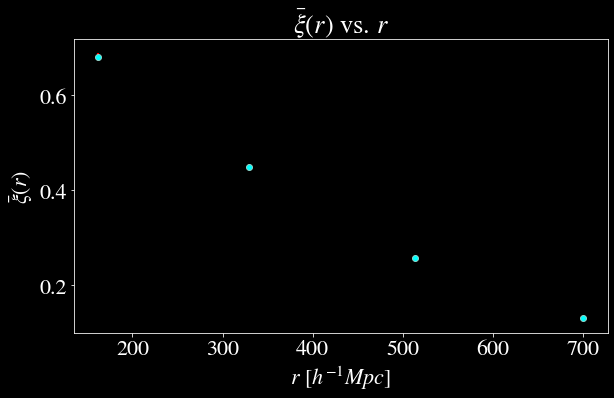

In [25]:
# import scipy.optimize as fitter

# #we have to define our model with our needed parameters
# xdata = rs_i
# ydata = corrs_final

# def model(x, b):
#     return b*x**(-3/2)

# par0 = np.array([1000]) # initial guess for parameters
# par, cov = fitter.curve_fit(model, xdata, ydata,sigma=corrs_final_error, par0) #fitter.curve_fit takes in the model, x,y data, guess, and sigma

# # par arrays contains the values of parameters. cov is the covariance matrix
# # decode it now
# b = par[0]
# eb = np.sqrt(cov[0,0])
# print('a={0:6.3f}+/-{1:5.3f}'.format(b,eb))
# # b = par[1]
# # eb = np.sqrt(cov[1,1])
# # print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))


f, (ax1) = plt.subplots(1,1, figsize=(9,6))
ax1.set_title('$\\bar{\\xi}(r)$ vs. $r$')
# ax1.plot(x_model, model(x_model, b),
#          color='limegreen',linestyle='--',
#          label='$r^{-3/2}$ Model')
ax1.errorbar(rs_i, corrs_final, yerr=corrs_final_error, mfc='cyan', fmt='o', ecolor='red')
ax1.errorbar(rs_i, corrs_final, yerr=corrs_final_error, mfc='cyan', fmt='none', ecolor='red')
ax1.set_xlabel('$r$ [$h^{-1} Mpc$]')
ax1.set_ylabel('$\\bar{\\xi}(r)$')
f.tight_layout()
plt.show()

Interesting, this seems a bit strange. The errors are pretty small

In [50]:
verbose=False
ell_max=3
for ell in range(0, ell_max+1):
    for m in range(0, ell+1):
        print("ell, m = " + str(ell) + ',' + str(m) if verbose==True else '') 

In [65]:
def do_stuff(a,b):
    print(a + b)
    
class test(object):
    def __init__(self, x,c):
        self.x = x
        self.y = do_stuff(self.x, c)
        
    

In [66]:
test_obj = test(5,4)

test_obj.y

9


In [ ]:
δ